# 2 Redes neuronales densamente conectadas


In [2]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9298113220669509775
]


Precarga de los datos en Keras

In [68]:
from keras.datasets import mnist
from keras import utils

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:10])

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [69]:
print(x_train.ndim) 
print(x_train.shape)
print(x_test.ndim) 
print(x_test.shape)

2
(60000, 784)
2
(10000, 784)


In [122]:
from keras.layers import Dense,Dropout # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=500, activation='relu', input_shape=(image_size,),kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=200,activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_45 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_46 (Dense)             (None, 10)                2010      
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


Predicciones

In [123]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                    batch_size=150, 
                    epochs=15, 
                    validation_data=(x_test, y_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 216us/step - loss: 1.8758 - accuracy: 0.8792 - val_loss: 0.7048 - val_accuracy: 0.9190
Epoch 2/15
60000/60000 [==============================] - 12s 206us/step - loss: 0.5358 - accuracy: 0.9327 - val_loss: 0.4499 - val_accuracy: 0.9316
Epoch 3/15
60000/60000 [==============================] - 13s 209us/step - loss: 0.4040 - accuracy: 0.9401 - val_loss: 0.3836 - val_accuracy: 0.9425
Epoch 4/15
60000/60000 [==============================] - 14s 232us/step - loss: 0.3633 - accuracy: 0.9446 - val_loss: 0.3506 - val_accuracy: 0.9431
Epoch 5/15
60000/60000 [==============================] - 14s 234us/step - loss: 0.3318 - accuracy: 0.9492 - val_loss: 0.3168 - val_accuracy: 0.9554
Epoch 6/15
60000/60000 [==============================] - 14s 232us/step - loss: 0.3102 - accuracy: 0.9522 - val_loss: 0.2830 - val_accuracy: 0.9603
Epoch 7/15
60000/60000 [==============================] 

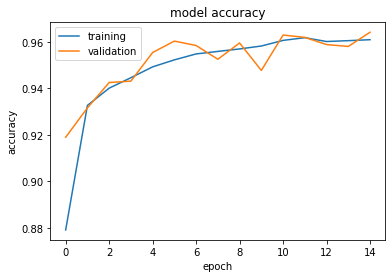

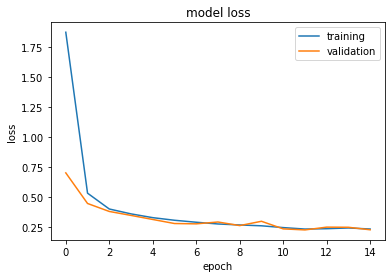

10000/10000 [==============================] - 1s 134us/step
Test loss: 0.231
Test accuracy: 0.964


In [124]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

loss, accuracy  = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')